In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
%matplotlib inline
import scipy as sci
import seaborn as sns

In [1]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [2]:
train = pd.read_csv('train.csv',parse_dates=['datetime'],date_parser=dateparse,index_col='datetime')
train.head()

NameError: name 'pd' is not defined

In [4]:
train.shape

(10886, 11)

In [5]:
test = pd.read_csv("test.csv",parse_dates=['datetime'],date_parser=dateparse,index_col='datetime')
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.shape

(6493, 8)

In [7]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
data = pd.concat([train,test],ignore_index=False)
data.head()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
datetime,,,,,,,,,,,
2011-01-01 00:00:00,14.395,3.0,16.0,0,81,13.0,1,9.84,1,0.0,0
2011-01-01 01:00:00,13.635,8.0,40.0,0,80,32.0,1,9.02,1,0.0,0
2011-01-01 02:00:00,13.635,5.0,32.0,0,80,27.0,1,9.02,1,0.0,0
2011-01-01 03:00:00,14.395,3.0,13.0,0,75,10.0,1,9.84,1,0.0,0
2011-01-01 04:00:00,14.395,0.0,1.0,0,75,1.0,1,9.84,1,0.0,0


In [9]:
data.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

Identifing categorical and continuous variables:
        - Categorical:
                - holiday
                - season
                - weather
                - workingday
        - Continuous:
                - atemp
                - temp
                - humidity
                - windspeed
        - Time Series
                - datetime

changing dtype of season, holiday, weather, workingday to category

In [12]:
data.holiday = data.holiday.astype('category')
data.weather = data.holiday.astype('category')
data.workingday = data.holiday.astype('category')
data.season = data.holiday.astype('category')

In [13]:
data.head()

,atemp,count,holiday,humidity,season,temp,weather,windspeed,workingday
datetime,,,,,,,,,
2011-01-01 00:00:00,14.395,16.0,0,81,0,9.84,0,0.0,0
2011-01-01 01:00:00,13.635,40.0,0,80,0,9.02,0,0.0,0
2011-01-01 02:00:00,13.635,32.0,0,80,0,9.02,0,0.0,0
2011-01-01 03:00:00,14.395,13.0,0,75,0,9.84,0,0.0,0
2011-01-01 04:00:00,14.395,1.0,0,75,0,9.84,0,0.0,0


## Time Series Analysis

In [14]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [15]:
TS = train.loc[:,['count']]

In [16]:
len(TS['2011-01-22'])

0

# Eliminating Trend - Doesn't work with high seasonality

## Moving average

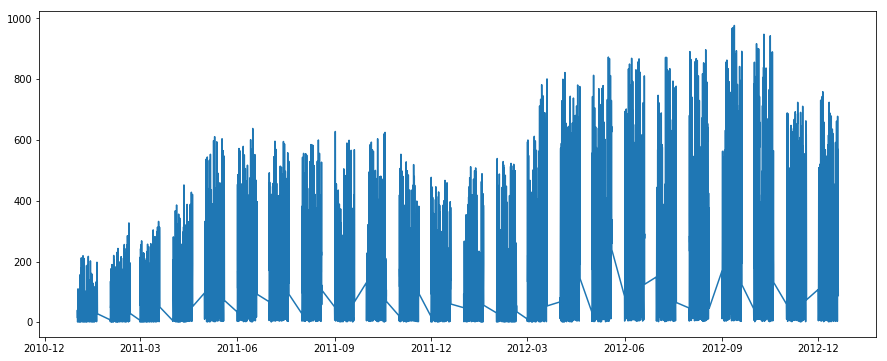

In [17]:
plt.plot(TS)

In [18]:
from statsmodels.tsa.stattools import adfuller

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=25).mean()
    rolstd = timeseries.rolling(window=25).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['count'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    


In [23]:
ts_log = np.log(TS)

In [25]:
mov_avg = ts_log.rolling(window=25).mean()
ts_log_moving_avg_diff = ts_log - mov_avg
ts_log_moving_avg_diff.head(12)

,count
datetime,
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,NaN
2011-01-01 02:00:00,NaN
2011-01-01 03:00:00,NaN
2011-01-01 04:00:00,NaN
2011-01-01 05:00:00,NaN
2011-01-01 06:00:00,NaN
2011-01-01 07:00:00,NaN
2011-01-01 08:00:00,NaN


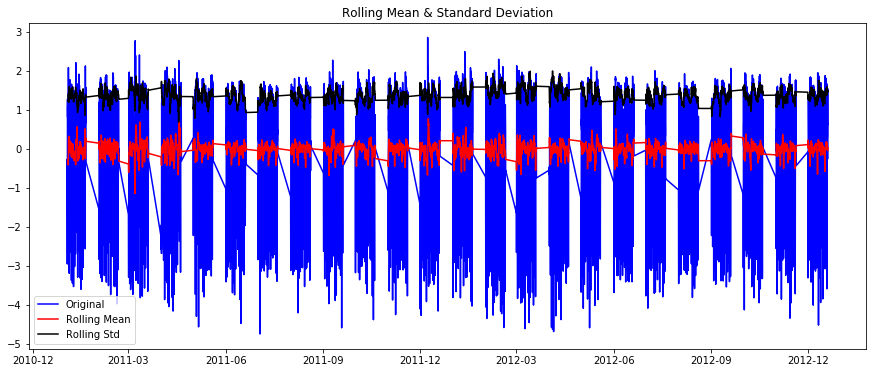

Results of Dickey-Fuller Test:
Test Statistic                   -25.335415
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10822.000000
Critical Value (1%)               -3.430954
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [58]:
test_stationarity(ts_log_moving_avg_diff)

## end - Moving average

## exponentially weighted moving average

In [59]:
expwighted_avg = ts_log.ewm(halflife=30,min_periods=25,adjust=True,ignore_na=False).mean()
expwighted_avg.head()

,count
datetime,
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,NaN
2011-01-01 02:00:00,NaN
2011-01-01 03:00:00,NaN
2011-01-01 04:00:00,NaN


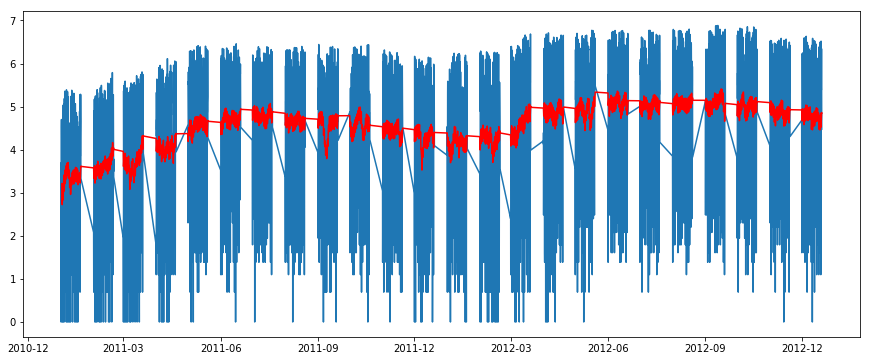

In [31]:
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

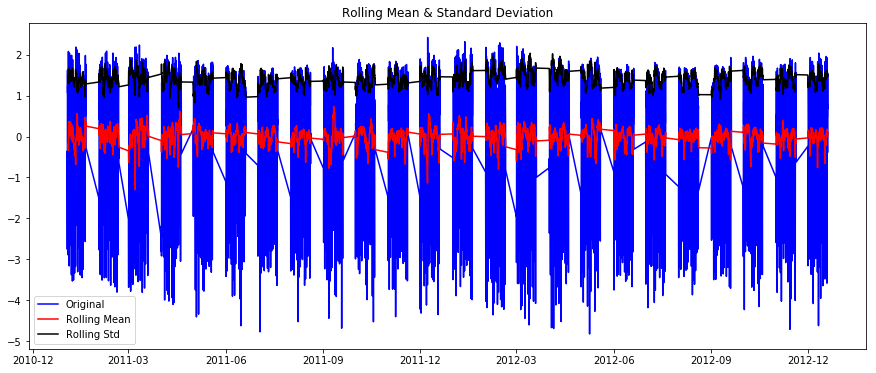

Results of Dickey-Fuller Test:
Test Statistic                -1.882212e+01
p-value                        2.022177e-30
#Lags Used                     3.900000e+01
Number of Observations Used    1.082200e+04
Critical Value (1%)           -3.430954e+00
Critical Value (5%)           -2.861807e+00
Critical Value (10%)          -2.566912e+00
dtype: float64


In [60]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)

# END - Eliminating Trend

# Eliminating Trend and Seasonality

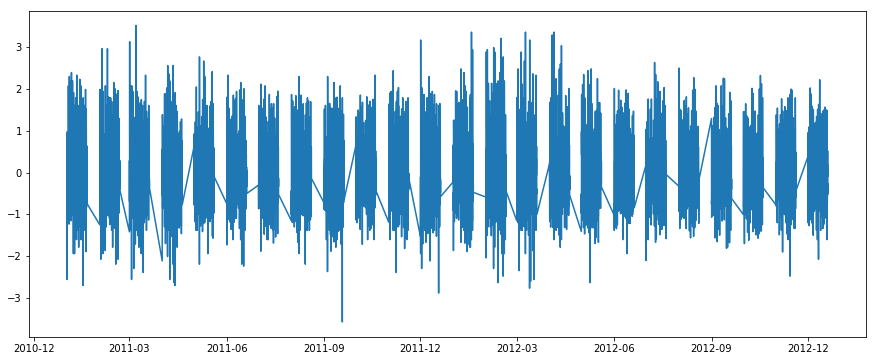

In [62]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

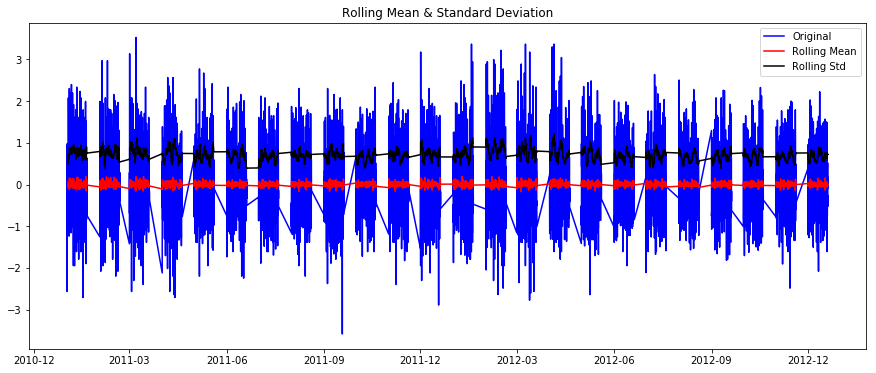

Results of Dickey-Fuller Test:
Test Statistic                   -22.930693
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10845.000000
Critical Value (1%)               -3.430953
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [63]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

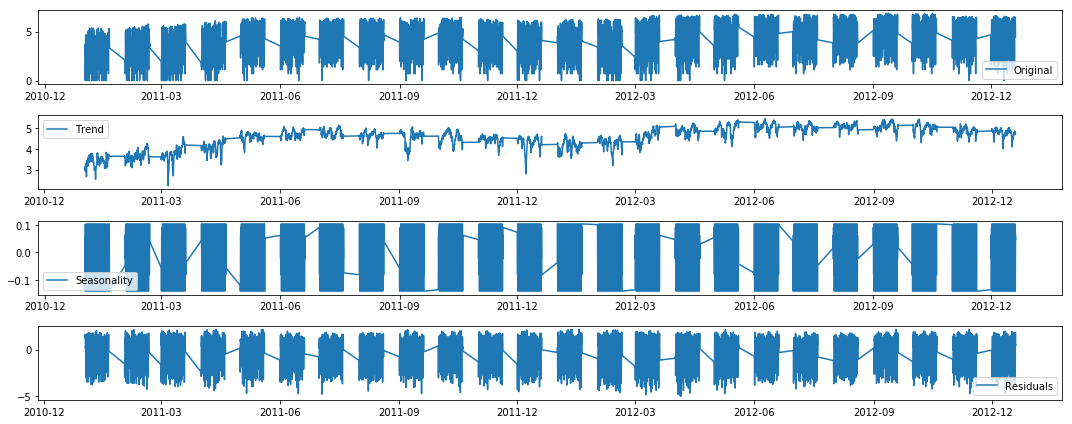

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

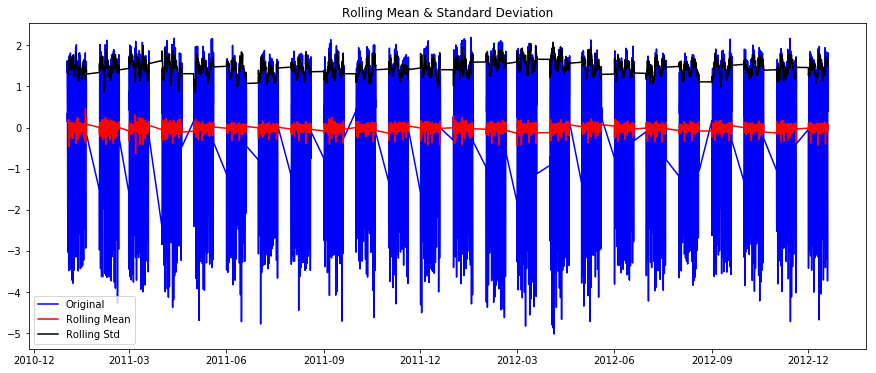

Results of Dickey-Fuller Test:
Test Statistic                   -29.792483
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10822.000000
Critical Value (1%)               -3.430954
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [68]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)